<a href="https://colab.research.google.com/github/HarrisKucukalic/CSS2_Group_3/blob/main/combined_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect to Google Drive, Import Libraries and Datasets

## Connect to drive and check Directory

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/Shareddrives/CSS2 - Research /Research Code

/content/gdrive/Shareddrives/CSS2 - Research /Research Code


In [3]:
!ls

 Angie.ipynb	       desktop.ini		 Isaac.ipynb	        Test_data.csv
'AT2 Prezzo.gslides'   Harris.ipynb		 mergeNotebooks.ipynb   Timothy.ipynb
 combined_code.ipynb  'IDS Prezzo Pretty.pptx'	 Samuel.ipynb	        Train_data.csv


## Import necessary libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(rc={"figure.dpi":120, 'savefig.dpi':120})

# sklearn
import sklearn as sk
from sklearn import *
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
# SVM
from sklearn.svm import SVC
# DT
from sklearn.tree import DecisionTreeClassifier
# RF
from sklearn.ensemble import RandomForestClassifier

## Intrusion Data

In [5]:
intrusion_data = pd.read_csv('Train_data.csv')
intrusion_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [6]:
intrusion_data['class'].value_counts()

class
normal     13449
anomaly    11743
Name: count, dtype: int64

In [7]:
value_counts = intrusion_data['class'].value_counts()
total_values = len(intrusion_data['class'].dropna())
percentages = (value_counts / total_values) * 100
print(percentages)

class
normal     53.385996
anomaly    46.614004
Name: count, dtype: float64


# Preprocessing

In [8]:
total_rows = len(intrusion_data)

missing_values = intrusion_data.isna().sum()

percentage_missing = (missing_values / total_rows) * 100
percentage_missing = percentage_missing.round(2)
print(percentage_missing)

duration                       0.0
protocol_type                  0.0
service                        0.0
flag                           0.0
src_bytes                      0.0
dst_bytes                      0.0
land                           0.0
wrong_fragment                 0.0
urgent                         0.0
hot                            0.0
num_failed_logins              0.0
logged_in                      0.0
num_compromised                0.0
root_shell                     0.0
su_attempted                   0.0
num_root                       0.0
num_file_creations             0.0
num_shells                     0.0
num_access_files               0.0
num_outbound_cmds              0.0
is_host_login                  0.0
is_guest_login                 0.0
count                          0.0
srv_count                      0.0
serror_rate                    0.0
srv_serror_rate                0.0
rerror_rate                    0.0
srv_rerror_rate                0.0
same_srv_rate       

## Testing Data

In [9]:
for column in intrusion_data.columns:
    print(f"Counts for {column}:")
    print(intrusion_data[column].value_counts())
    print("------------")

Counts for duration:
duration
0        23168
1          374
2          165
3          102
4           75
         ...  
17025        1
12892        1
584          1
10774        1
322          1
Name: count, Length: 758, dtype: int64
------------
Counts for protocol_type:
protocol_type
tcp     20526
udp      3011
icmp     1655
Name: count, dtype: int64
------------
Counts for service:
service
http         8003
private      4351
domain_u     1820
smtp         1449
ftp_data     1396
             ... 
urh_i           4
red_i           3
pm_dump         3
tim_i           2
http_8001       1
Name: count, Length: 66, dtype: int64
------------
Counts for flag:
flag
SF        14973
S0         7009
REJ        2216
RSTR        497
RSTO        304
S1           88
SH           43
RSTOS0       21
S2           21
S3           15
OTH           5
Name: count, dtype: int64
------------
Counts for src_bytes:
src_bytes
0        9866
8         738
1         480
44        467
45        416
         ... 
37

#Attribute Analyses and Input selection

In [10]:
intrusion_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
intrusion_data = pd.read_csv('Train_data.csv')

In [12]:
intrusion_data_right = intrusion_data
intrusion_data_right['class_label'] = (intrusion_data_right['class'] == 'anomaly').astype(int)
intrusion_data_right = intrusion_data_right.drop(['class'], axis=1)
intrusion_data_right

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,1
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1


In [13]:
int_data_no_strings = intrusion_data_right.select_dtypes(exclude=['object'])
int_data_no_strings

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_label
0,0,491,0,0,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,146,0,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,0,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,232,8153,0,0,0,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,199,420,0,0,0,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,0,0,0,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1
25188,0,334,0,0,0,0,0,0,1,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,1
25189,0,0,0,0,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
25190,0,0,0,0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1


In [14]:
from sklearn.feature_selection import mutual_info_classif

X = int_data_no_strings.drop('class_label', axis=1)
y = int_data_no_strings['class_label']

mutual_info = mutual_info_classif(X, y)
attribute_info_gain = pd.Series(mutual_info, index=X.columns)

top_ten_attributes = attribute_info_gain.nlargest(10)

print(top_ten_attributes)

src_bytes                   0.562480
dst_bytes                   0.437020
diff_srv_rate               0.358740
same_srv_rate               0.356371
dst_host_srv_count          0.325846
dst_host_same_srv_rate      0.305427
dst_host_diff_srv_rate      0.288567
logged_in                   0.279996
dst_host_serror_rate        0.278079
dst_host_srv_serror_rate    0.272950
dtype: float64


In [15]:
int_corr = intrusion_data[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','logged_in','dst_host_serror_rate','dst_host_srv_serror_rate', 'class_label']]

In [16]:
intrusion_data_right['class_label'].value_counts()

class_label
0    13449
1    11743
Name: count, dtype: int64

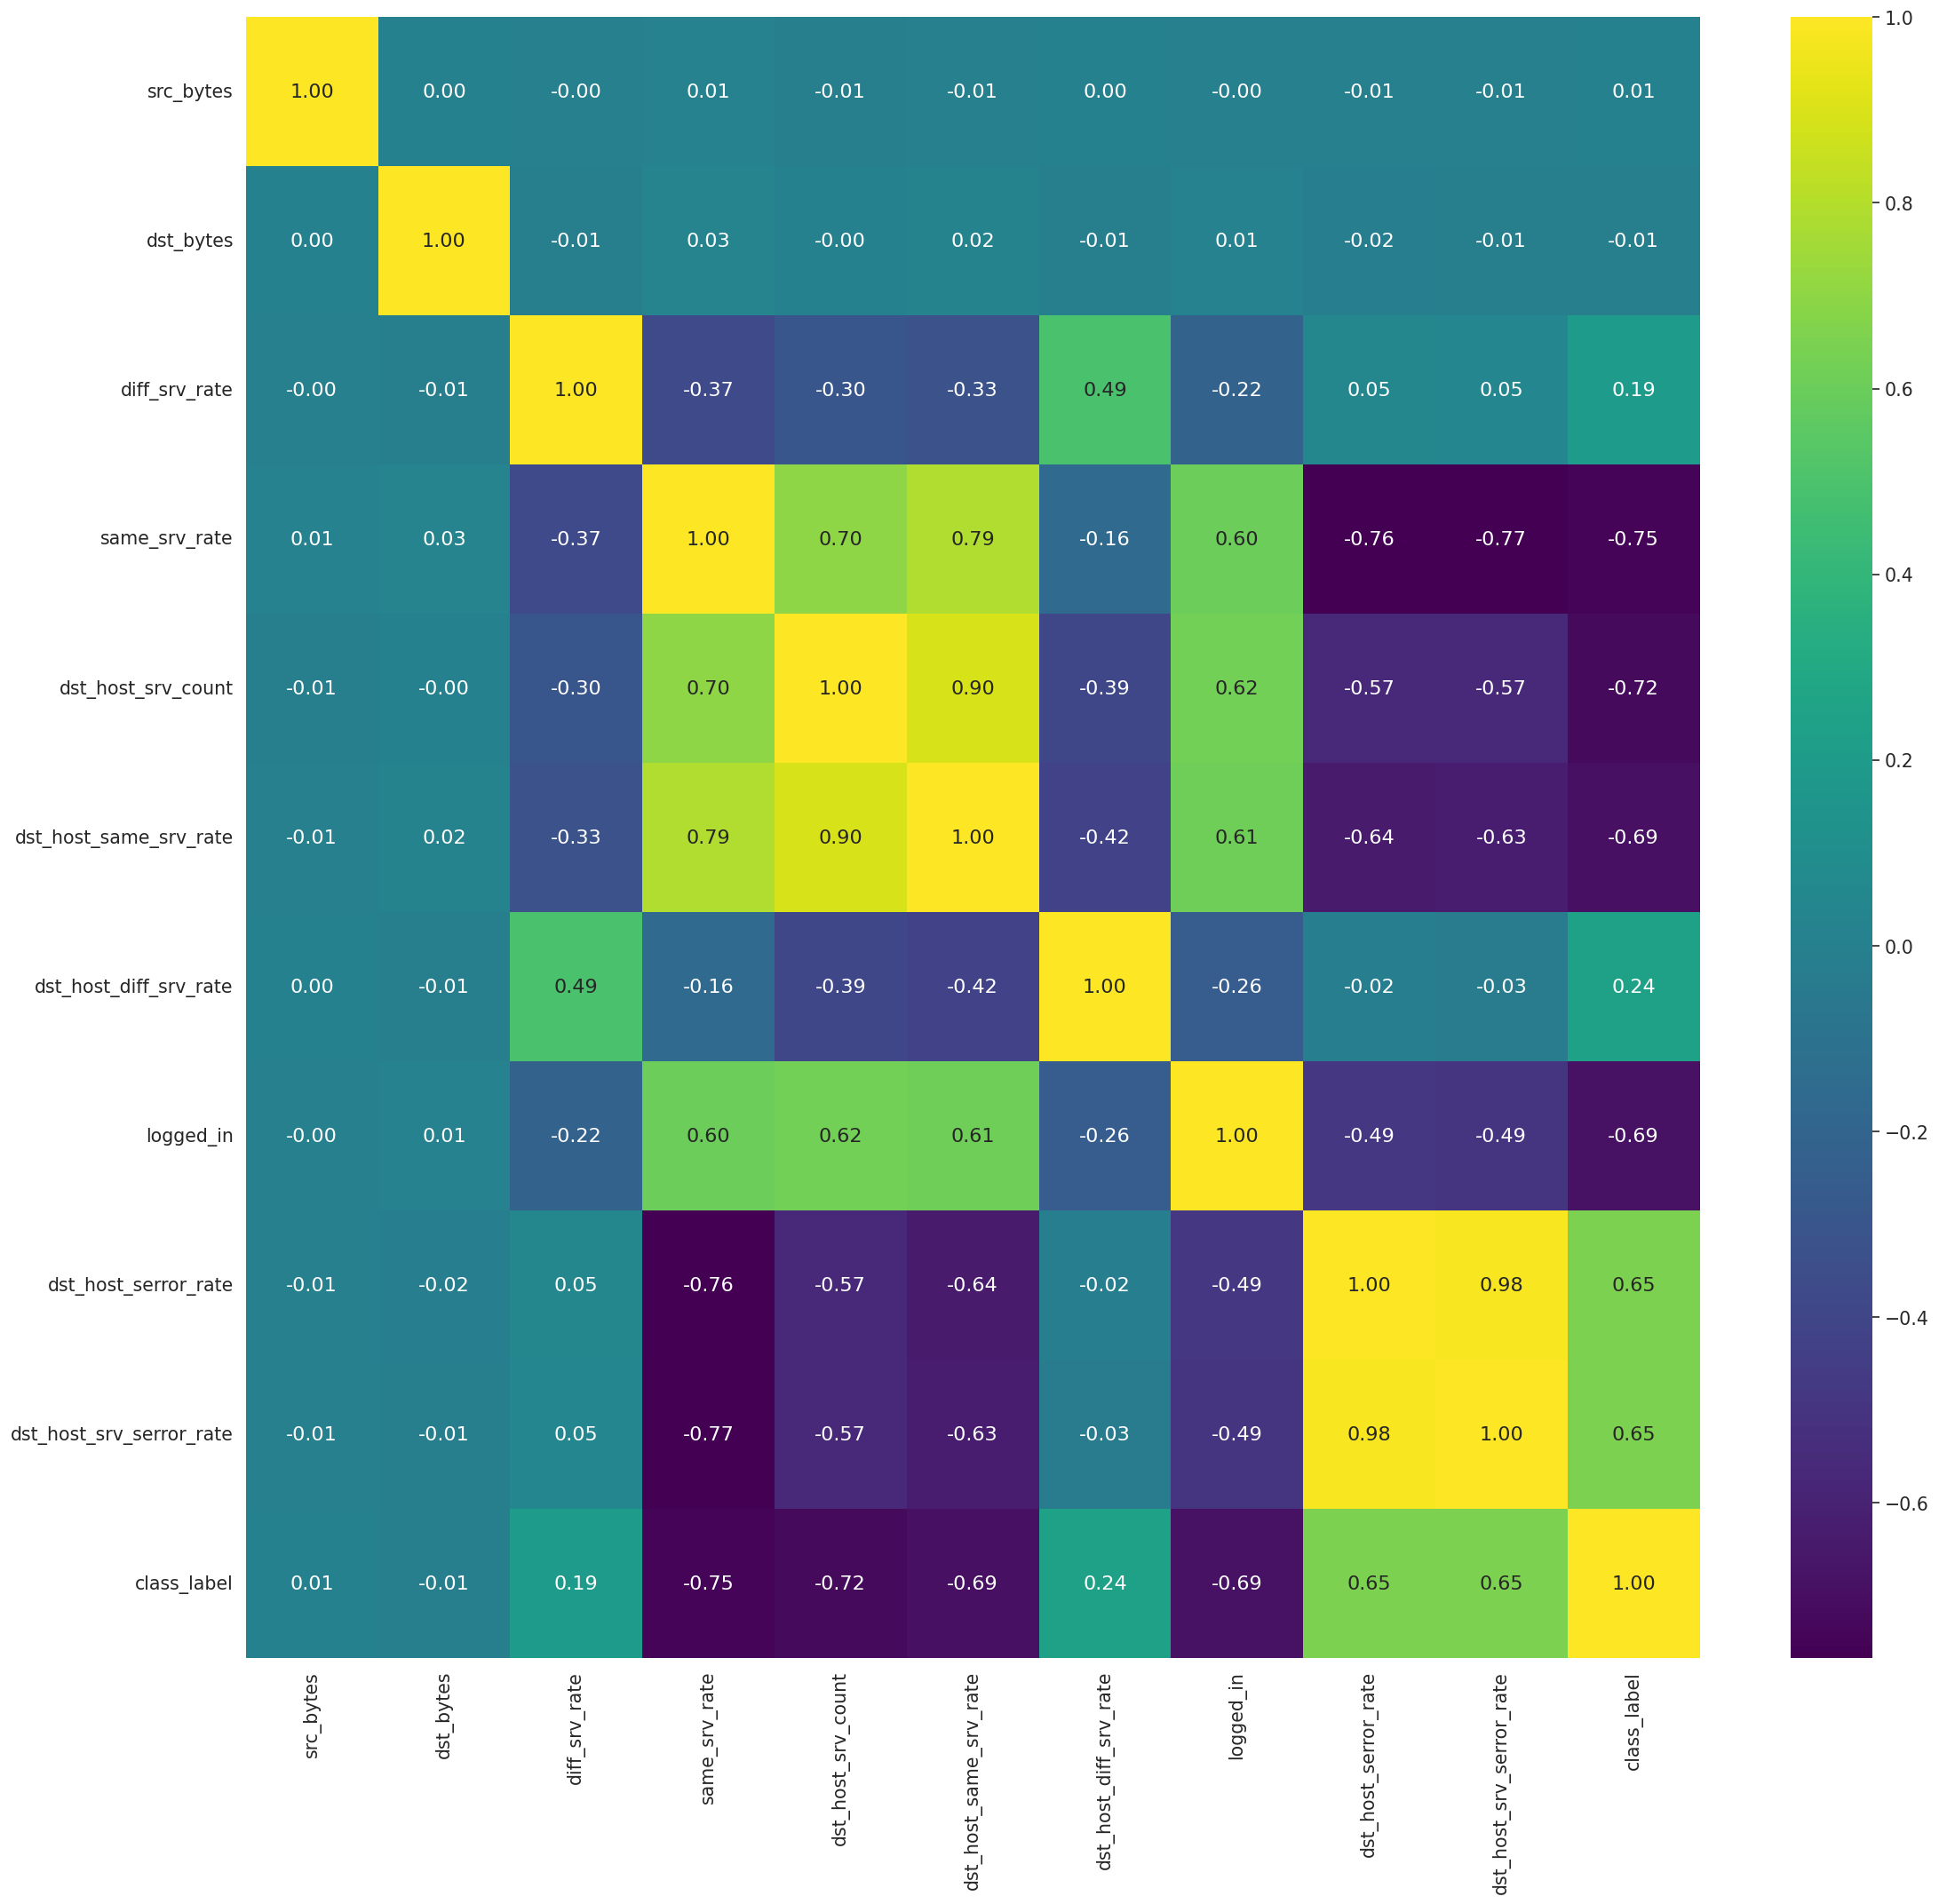

In [17]:
int_corr = int_corr.corr()
plt.figure(figsize=(22, 20))
sns.set_context('paper', font_scale=1.4)
sns.heatmap(int_corr, annot=True, cmap='viridis', fmt='.2f')
plt.show()

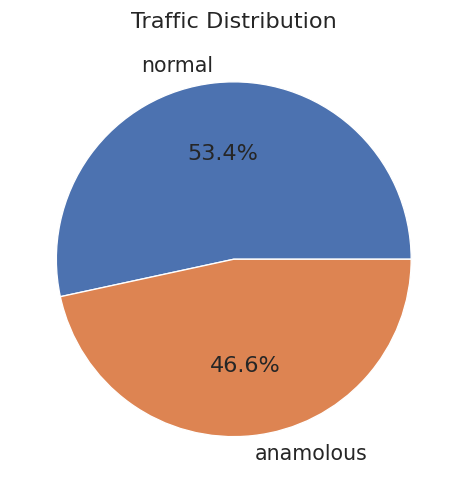

In [18]:
label_counts = intrusion_data['class'].value_counts()
plt.pie(label_counts, labels=['normal', 'anamolous'], autopct='%1.1f%%')
plt.title('Traffic Distribution')
plt.show()

# Splitting Data

In [19]:
top_10_info_gain = intrusion_data[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count', 'class_label']]

In [20]:
top_10_info_gain

,src_bytes,dst_bytes,diff_srv_rate,same_srv_rate,dst_host_srv_count,class_label
0,491,0,0.00,1.00,25,0
1,146,0,0.15,0.08,1,0
2,0,0,0.07,0.05,26,1
3,232,8153,0.00,1.00,255,0
4,199,420,0.00,1.00,255,0
...,...,...,...,...,...,...
25187,0,0,0.07,0.07,7,1
25188,334,0,0.00,1.00,39,1
25189,0,0,0.07,0.07,13,1
25190,0,0,0.06,0.14,20,1


In [21]:
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
# Create a subset of the dataset excluding the specified columns
subset_data_train = top_10_info_gain[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count']]

# Perform z-score normalization on the selected columns
std_scaler = StandardScaler()
normalized_data_train = std_scaler.fit_transform(subset_data_train)

# Create a DataFrame with normalized data
normalized_df_train = pd.DataFrame(normalized_data_train, columns=subset_data_train.columns)
normalized_df_train['class_label'] = top_10_info_gain['class_label']
normalized_df_train.describe()

,src_bytes,dst_bytes,diff_srv_rate,same_srv_rate,dst_host_srv_count,class_label
count,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,25192.000000
mean,1.410255e-19,-5.641019e-19,-4.195508e-18,-1.452562e-17,-6.035890e-17,0.466140
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,0.498862
min,-1.009252e-02,-3.930979e-02,-3.492819e-01,-1.502538e+00,-1.039933e+00,0.000000
25%,-1.009252e-02,-3.930979e-02,-3.492819e-01,-1.297820e+00,-9.495537e-01,0.000000
50%,-1.007427e-02,-3.930979e-02,-3.492819e-01,7.721087e-01,-4.886186e-01,0.000000
75%,-9.976793e-03,-3.334045e-02,-1.323494e-02,7.721087e-01,1.264742e+00,1.000000
max,1.583257e+02,5.795287e+01,5.251501e+00,7.721087e-01,1.264742e+00,1.000000


In [22]:
from sklearn.model_selection import train_test_split
X = normalized_df_train.drop(["class_label"], axis=1)
y = normalized_df_train["class_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [23]:
# Get the last two hundred samples from the test  to be the future data samples
futureSample_X = X_test[-2500:]
futureSample_y = y_test[-2500:]

# Remove the last two hundred samples from the test dataset
X_test = X_test[0:-2500]
y_test = y_test[0:-2500]

In [24]:
y_train

11016    0
9763     0
17315    0
23026    0
203      0
        ..
11019    1
16813    0
12084    1
22744    0
3023     0
Name: class_label, Length: 17634, dtype: int64

In [25]:
y_train.value_counts()

class_label
0    9423
1    8211
Name: count, dtype: int64

# xgBoost - benchmark and GA Accuracy measure

In [26]:
top_10_info = intrusion_data[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','logged_in','dst_host_serror_rate','dst_host_srv_serror_rate', 'class_label']]

In [27]:
from sklearn.model_selection import train_test_split
# X_base = int_data_no_strings.drop(["class_label"], axis=1)
# y_base = int_data_no_strings["class_label"]
X_base = int_data_no_strings.drop(["class_label"], axis=1)
y_base = int_data_no_strings["class_label"]
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base, y_base, test_size=0.3)

In [28]:
# Get the last two hundred samples from the test  to be the future data samples
futureSample_X_base = X_test_base[-2500:]
futureSample_y_base = y_test_base[-2500:]

# Remove the last two hundred samples from the test dataset
X_test_base = X_test_base[0:-2500]
y_test_base = y_test_base[0:-2500]

In [29]:
X_test_base

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
5375,0,0,0,0,0,0,0,0,0,0,...,119,242,1.00,0.00,0.01,0.02,0.00,0.0,0.76,0.88
3182,0,217,1893,0,0,0,0,0,1,0,...,12,255,1.00,0.00,0.08,0.03,0.00,0.0,0.00,0.00
22982,0,195,10849,0,0,0,0,0,1,0,...,5,255,1.00,0.00,0.20,0.06,0.00,0.0,0.00,0.00
18484,0,43,126,0,0,0,0,0,0,0,...,177,196,0.77,0.02,0.68,0.01,0.00,0.0,0.08,0.00
7160,0,237,4326,0,0,0,0,0,1,0,...,146,255,1.00,0.00,0.01,0.02,0.01,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19009,5,11556,1383,0,0,0,0,0,1,0,...,62,164,0.81,0.06,0.02,0.01,0.00,0.0,0.00,0.00
23376,9,1956,335,0,0,0,0,0,1,0,...,249,126,0.51,0.01,0.00,0.00,0.00,0.0,0.00,0.00
24113,0,329,6148,0,0,0,0,0,1,0,...,15,255,1.00,0.00,0.07,0.05,0.00,0.0,0.00,0.00
10930,0,0,0,0,0,0,0,0,0,0,...,255,1,0.00,1.00,0.00,0.00,0.08,0.0,0.87,1.00


In [30]:
from sklearn.ensemble import GradientBoostingClassifier
xgBoostClassifier = GradientBoostingClassifier()
xgBoostClassifier.fit(X_test_base, y_test_base)

GradientBoostingClassifier()

## Measure Gradient Boost's performance

In [31]:
# Predict the class labels of samples in the test dataset
y_pred_xgb = xgBoostClassifier.predict(X_test_base)

In [32]:
score_test = accuracy_score(y_test_base, y_pred_xgb)
print (score_test)

0.9972321075523922


In [33]:
precision_test = precision_score(y_test_base, y_pred_xgb, average='macro')
print (precision_test)

0.9972708623946123


In [34]:
recall_test = recall_score(y_test_base, y_pred_xgb, average='macro')
print (recall_test)

0.9971734703886066


In [35]:
f1_test =  f1_score(y_test_base, y_pred_xgb, average='macro')
print(f1_test)

0.9972215355712661


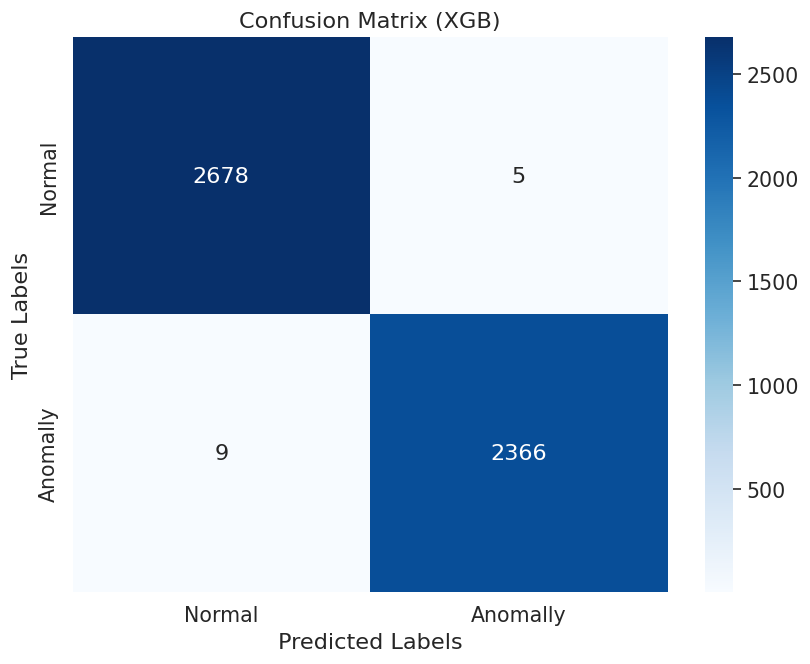

In [36]:
mat = confusion_matrix(y_test_base, y_pred_xgb)
class_names = ["Normal", "Anomally"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (XGB)")
plt.show()

The AUC is 1.000


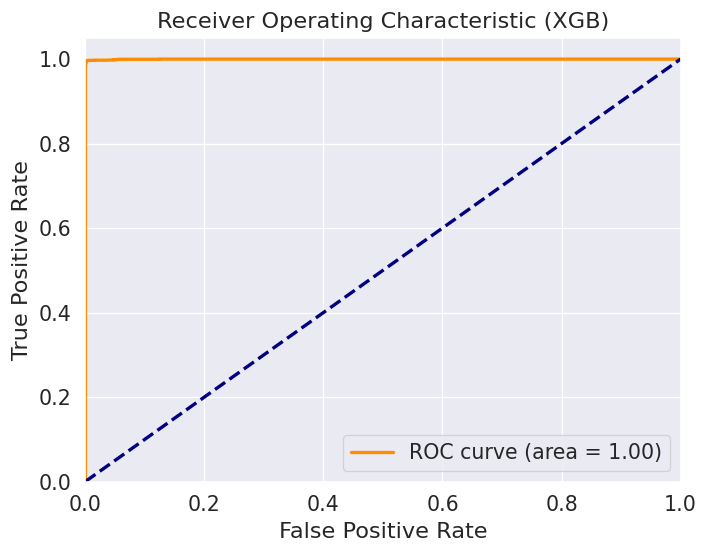

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = xgBoostClassifier.predict_proba(X_test_base)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test_base, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test_base, y_probs_class_1, pos_label=1)

# print("Threshold\tTPR vs FPR")
# for f, p, t in zip(fpr, tpr, thresholds):
#     print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (XGB)')
plt.legend(loc="lower right")
plt.show()

# Genetic Algorithm - Feature Selection (Using Models)



Reference - https://www.kaggle.com/code/tanmayunhale/genetic-algorithm-for-feature-selection

In [38]:
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=bool)
        chromosome[:int(0.3*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

In [39]:
def fitness_score(population):
    scores = []
    for chromosome in population:
        logmodel.fit(X_train_base.iloc[:,chromosome],y_train_base)
        predictions = logmodel.predict(X_test_base.iloc[:,chromosome])
        scores.append(accuracy_score(y_test_base,predictions))
    scores, population = np.array(scores), np.array(population)
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

In [40]:
def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

In [41]:
def crossover(pop_after_sel):
    pop_nextgen = pop_after_sel
    for i in range(0,len(pop_after_sel),2):
        new_par = []
        child_1 , child_2 = pop_nextgen[i] , pop_nextgen[i+1]
        new_par = np.concatenate((child_1[:len(child_1)//2],child_2[len(child_1)//2:]))
        pop_nextgen.append(new_par)
    return pop_nextgen


In [42]:
def mutation(pop_after_cross,mutation_rate,n_feat):
    mutation_range = int(mutation_rate*n_feat)
    pop_next_gen = []
    for n in range(0,len(pop_after_cross)):
        chromo = pop_after_cross[n]
        rand_posi = []
        for i in range(0,mutation_range):
            pos = np.random.randint(0,n_feat-1)
            rand_posi.append(pos)
        for j in rand_posi:
            chromo[j] = not chromo[j]
        pop_next_gen.append(chromo)
    return pop_next_gen

In [43]:
def generations(df,label,size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, Y_train, Y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print('Best score in generation',i+1,':',scores[:1])  #2
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate,n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [44]:
z = X_base.shape[1]
z

38

In [45]:
# logmodel = xgBoostClassifier
# chromo_df_bc, score_bc = generations(X_base,y_base,size=80, n_feat=X_base.shape[1], n_parents=64,
#                                   mutation_rate=0.20,n_gen=5, X_train = X_train_base,
#                                   X_test = X_test_base, Y_train = y_train_base, Y_test = y_test_base)

In [46]:
len(int_data_no_strings.columns)

39

In [47]:
# selected_features = X_base.columns[chromo_df_bc[4]]
# print(selected_features.tolist())

In [48]:
# len(selected_features.tolist())

# Binary Cuckoo Search Algorithm

In [94]:
import random
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        egg = np.ones(n_feat,dtype=bool)
        egg[:int(0.3*n_feat)]=False
        np.random.shuffle(egg)
        x = random.uniform(0, 1)
        population.append((egg, x))
    return population

In [95]:
population_nextgen=initilization_of_population(64,X_base.shape[1])

In [97]:
population_nextgen

[(array([ True,  True,  True,  True,  True,  True, False,  True, False,
          True,  True,  True,  True, False,  True, False, False,  True,
         False,  True,  True, False,  True, False,  True,  True,  True,
         False,  True,  True,  True,  True, False,  True,  True, False,
          True,  True]),
  0.30130504977654027),
 (array([ True, False, False,  True,  True, False,  True,  True, False,
          True,  True, False,  True,  True,  True,  True, False,  True,
          True,  True,  True,  True,  True,  True,  True,  True, False,
          True,  True,  True, False, False, False,  True,  True,  True,
         False,  True]),
  0.10102514115364358),
 (array([ True,  True,  True,  True,  True, False,  True, False, False,
          True,  True,  True, False,  True, False,  True,  True, False,
          True,  True,  True,  True, False,  True,  True, False,  True,
          True,  True,  True, False,  True,  True, False,  True,  True,
          True, False]),
  0.097819831

In [96]:
len(population_nextgen)

64

In [100]:
X_base

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,491,0,0,0,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,146,0,0,0,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,0,0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,232,8153,0,0,0,0,0,1,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,199,420,0,0,0,0,0,1,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,0,0,0,0,0,0,0,0,0,...,255,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00
25188,0,334,0,0,0,0,0,0,1,0,...,1,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00
25189,0,0,0,0,0,0,0,0,0,0,...,255,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00
25190,0,0,0,0,0,0,0,0,0,0,...,255,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00


In [103]:
init_pop=initilization_of_population(80,X_base.shape[1])
init_pop

[(array([ True,  True,  True,  True,  True,  True,  True, False,  True,
         False, False, False,  True, False,  True,  True,  True,  True,
         False,  True, False,  True, False,  True,  True, False, False,
         False,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True]),
  0.33281421639799236),
 (array([ True,  True,  True, False,  True,  True, False,  True,  True,
          True,  True,  True,  True,  True,  True, False,  True,  True,
         False,  True,  True,  True,  True,  True, False, False,  True,
         False,  True, False,  True,  True,  True,  True,  True, False,
         False, False]),
  0.8872359959865087),
 (array([ True,  True,  True, False,  True, False,  True,  True, False,
          True, False,  True,  True,  True,  True,  True, False, False,
          True,  True, False, False,  True,  True, False,  True,  True,
          True,  True, False,  True, False,  True,  True,  True,  True,
          True,  True]),
  0.5473580606

In [114]:
init_pop[0][0]

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False, False,  True,  True, False,  True,  True, False,
        True, False, False,  True,  True, False,  True, False, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True])

In [ ]:
def levy_flight(dim):
    sigma = (gamma(1 + beta) * np.sin(np.pi * beta / 2) / (gamma((1 + beta) / 2) * beta * 2 ** ((beta - 1) / 2))) ** (1 / beta)
    u = np.random.normal(0, sigma, dim)
    v = np.random.normal(0, 1, dim)
    step = u / np.abs(v) ** (1 / beta)
    return step

In [121]:
init_pop=initilization_of_population(80,X_base.shape[1])
f = 0
worst_nest = None
worst_fitness = float('inf')

for nest in init_pop:
  if nest[1] >= 0.5:
    xgBoostClassifier.fit(X_train_base.iloc[:, nest[0]], y_train_base)
    predictions = xgBoostClassifier.predict(X_test_base.iloc[:, nest[0]])
    fitness = accuracy_score(y_test_base, predictions)
    print(fitness)

  if fitness < worst_fitness:
      worst_nest = nest
      worst_fitness = fitness

new_nest = np.random.choice([True, False], size=X_base.shape[1])
xgBoostClassifier.fit(X_train_base.iloc[:, nest[0]], y_train_base)
predictions = xgBoostClassifier.predict(X_test_base.iloc[:, nest[0]])
new_fitness = accuracy_score(y_test_base, predictions)

# if new_fitness > worst_fitness:
#     init_pop[init_pop.index(worst_nest)] = new_nest



0.9920917358639778
0.9727164887307236
0.9883353103993673
0.9914986160537762
0.994266508501384
0.9901146698299723
0.9859628311585606
0.9905100830367735
0.988928430209569
0.9932779754843811
0.9932779754843811
0.994266508501384
0.9920917358639778
0.9839857651245552
0.9922894424673784
0.9914986160537762
0.9897192566231712
0.9897192566231712
0.9911032028469751
0.9934756820877817
0.9916963226571768
0.9916963226571768
0.9839857651245552
0.9932779754843811
0.9922894424673784
0.9918940292605773
0.9916963226571768
0.9901146698299723
0.9911032028469751
0.9918940292605773
0.9911032028469751
0.9938710952945828
0.9918940292605773
0.9926848556741795
0.9899169632265717
0.992487149070779
0.9926848556741795
0.9914986160537762


# Support Vector Machine

In [ ]:
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
# Create a subset of the dataset excluding the specified columns
subset_data_train = int_data_no_strings[['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'logged_in', 'num_compromised', 'root_shell', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'count', 'serror_rate', 'rerror_rate', 'same_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate']]
# subset_data_train = int_data_no_strings
# Perform z-score normalization on the selected columns
std_scaler = StandardScaler()
normalized_data_train = std_scaler.fit_transform(subset_data_train)

# Create a DataFrame with normalized data
normalized_df_train = pd.DataFrame(normalized_data_train, columns=subset_data_train.columns)
normalized_df_train['class_label'] = top_10_info_gain['class_label']
normalized_df_train.describe()

In [ ]:
from sklearn.model_selection import train_test_split
X = normalized_df_train.drop(["class_label"], axis=1)
y = normalized_df_train["class_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Get the last two hundred samples from the test  to be the future data samples
futureSample_X = X_test[-2500:]
futureSample_y = y_test[-2500:]

# Remove the last two hundred samples from the test dataset
X_test = X_test[0:-2500]
y_test = y_test[0:-2500]

## Train SVM

In [ ]:
SVM_classifier = SVC(probability=True)
SVM_classifier.fit(X_train, y_train)

## Measure SVM's performance

In [ ]:
# Predict the class labels of samples in the test dataset
y_pred_SVM = SVM_classifier.predict(X_test)

In [ ]:
score_test = accuracy_score(y_test, y_pred_SVM)
print (score_test)

In [ ]:
precision_test = precision_score(y_test, y_pred_SVM, average='macro')
print (precision_test)

In [ ]:
recall_test = recall_score(y_test, y_pred_SVM, average='macro')
print (recall_test)

In [ ]:
f1_test =  f1_score(y_test, y_pred_SVM, average='macro')
print(f1_test)

In [ ]:
X_test.shape

In [ ]:
mat = confusion_matrix(y_test, y_pred_SVM)
class_names = ["Normal", "Anomally"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (SVM with GA)")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred_SVM)
print(report)

## ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = SVM_classifier.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

# print("Threshold\tTPR vs FPR")
# for f, p, t in zip(fpr, tpr, thresholds):
#     print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SVM)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = SVM_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SVM)')
plt.legend(loc="lower right")
plt.show()

## Measuring performance on small unseen set

In [ ]:
solution_validate = SVM_classifier.predict(futureSample_X)

In [ ]:
score_validate = accuracy_score(futureSample_y, solution_validate)
print (score_validate)

#Naive Bayes

## Splitting Data

In [ ]:
top_10_info_gain = int_data_no_strings[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','logged_in','dst_host_serror_rate','dst_host_srv_serror_rate', 'class_label']]

In [ ]:
from sklearn.model_selection import train_test_split
X = top_10_info_gain.drop(["class_label"], axis=1)
y = top_10_info_gain["class_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Normalisation
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
y_scaler = StandardScaler()

# X_scaler.fit(X_train)

X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

# y_train = y_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
# y_test = y_scaler.transform(y_test.reshape(-1, 1)).flatten()

In [ ]:
# Get the last two hundred samples from the test  to be the future data samples
futureSample_X = X_test[-200:]
futureSample_y = y_test[-200:]

# Remove the last two hundred samples from the test dataset
X_test = X_test[0:-200]
y_test = y_test[0:-200]

In [ ]:
y_train.value_counts()

## Train Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB_classifier = GaussianNB()
GNB_classifier.fit(X_train, y_train)

In [ ]:
# Predict the class labels of samples in the test dataset
y_pred_GNB = GNB_classifier.predict(X_test)

In [ ]:
score_test = accuracy_score(y_test, y_pred_GNB)
print (score_test)

In [ ]:
precision_test = precision_score(y_test, y_pred_GNB, average='macro')
print (precision_test)

In [ ]:
recall_test = recall_score(y_test, y_pred_GNB, average='macro')
print (recall_test)

In [ ]:
f1_test =  f1_score(y_test, y_pred_GNB, average='macro')
print(f1_test)

In [ ]:
mat = confusion_matrix(y_test, y_pred_GNB)
class_names = ["Normal", "Anomally"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (GNB)")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred_GNB)
print(report)

## ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = GNB_classifier.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

print("Threshold\tTPR vs FPR")
for f, p, t in zip(fpr, tpr, thresholds):
    print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (GNB)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = GNB_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (GNB)')
plt.legend(loc="lower right")
plt.show()

## Measuring performance on small unseen set

In [ ]:
solution_validate = GNB_classifier.predict(futureSample_X)

In [ ]:
score_validate = accuracy_score(futureSample_y, solution_validate)
print (score_validate)

# Decision Tree

## Splitting Data

In [ ]:
int_data_no_strings = intrusion_data_right.select_dtypes(exclude=['object'])
int_data_no_strings

In [ ]:
top_10_info_gain = intrusion_data[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','logged_in','dst_host_serror_rate','dst_host_srv_serror_rate', 'class_label']]

In [ ]:
top_10_info_gain = int_data_no_strings

In [ ]:
from sklearn.model_selection import train_test_split
X = top_10_info_gain.drop(["class_label"], axis=1)
y = top_10_info_gain["class_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Get the last two hundred samples from the test  to be the future data samples
futureSample_X = X_test[-2500:]
futureSample_y = y_test[-2500:]

# Remove the last two hundred samples from the test dataset
X_test = X_test[0:-2500]
y_test = y_test[0:-2500]

In [ ]:
futureSample_X

In [ ]:
y_train.value_counts()

## Train Decision Tree

In [ ]:
# DT_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=40,
#                                        min_samples_leaf=1, min_samples_split=2)
DT_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=100, min_samples_leaf=100, min_samples_split=300)
DT_classifier.fit(X_train, y_train)

## Measure Decision Tree's performance

In [ ]:
# Predict the class labels of samples in the test dataset
y_pred_DT = DT_classifier.predict(X_test)

In [ ]:
score_test = accuracy_score(y_test, y_pred_DT)
print (score_test)

In [ ]:
precision_test = precision_score(y_test, y_pred_DT, average='macro')
print (precision_test)

In [ ]:
recall_test = recall_score(y_test, y_pred_DT, average='macro')
print (recall_test)

In [ ]:
f1_test =  f1_score(y_test, y_pred_DT, average='macro')
print(f1_test)

In [ ]:
mat = confusion_matrix(y_test, y_pred_DT)
class_names = ["Normal", "Anomally"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Decision Tree)")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred_DT)
print(report)

## ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = DT_classifier.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

print("Threshold\tTPR vs FPR")
for f, p, t in zip(fpr, tpr, thresholds):
    print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Decision Tree)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = DT_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (DT)')
plt.legend(loc="lower right")
plt.show()

## Measuring performance on small unseen set

In [ ]:
solution_validate = DT_classifier.predict(futureSample_X)

In [ ]:
score_validate = accuracy_score(futureSample_y, solution_validate)
print (score_validate)

# Random Forrest

##Splitting Data

In [ ]:
top_10_info_gain = intrusion_data[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','logged_in','dst_host_serror_rate','dst_host_srv_serror_rate', 'class_label']]

In [ ]:
top_10_info_gain = int_data_no_strings

In [ ]:
from sklearn.model_selection import train_test_split
X = top_10_info_gain.drop(["class_label"], axis=1)
y = top_10_info_gain["class_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Get the last two hundred samples from the test  to be the future data samples
futureSample_X = X_test[-200:]
futureSample_y = y_test[-200:]

# Remove the last two hundred samples from the test dataset
X_test = X_test[0:-200]
y_test = y_test[0:-200]

In [ ]:
y_train.value_counts()

## Train Random Forrest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(
    criterion='entropy',
    max_depth=30,  # Reducing max_depth
    min_samples_leaf=50,  # Increasing min_samples_leaf further
    min_samples_split=100,  # Increasing min_samples_split further
    n_estimators=200,  # Reducing the number of estimators further
    max_features=0.2,  # Using a smaller fraction of features for each split
    bootstrap=True,
    oob_score=True,
    random_state=42,
    class_weight='balanced_subsample'  # Handling class imbalance by subsampling
)
RF_classifier.fit(X_train, y_train)

## Measure Random Forrest's performance

In [ ]:
X_test

In [ ]:
# Predict the class labels of samples in the test dataset
y_pred_RF = RF_classifier.predict(X_test)

In [ ]:
score_test = accuracy_score(y_test, y_pred_RF)
print (score_test)

In [ ]:
precision_test = precision_score(y_test, y_pred_RF, average='macro')
print (precision_test)

In [ ]:
recall_test = recall_score(y_test, y_pred_RF, average='macro')
print (recall_test)

In [ ]:
f1_test =  f1_score(y_test, y_pred_RF, average='macro')
print(f1_test)

In [ ]:
mat = confusion_matrix(y_test, y_pred_RF)
class_names = ["Normal", "Anomally"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Random Forest)")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred_RF)
print(report)

## ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = RF_classifier.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

print("Threshold\tTPR vs FPR")
for f, p, t in zip(fpr, tpr, thresholds):
    print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Random Forest)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = RF_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (RF)')
plt.legend(loc="lower right")
plt.show()

## Measuring performance on small unseen set

In [ ]:
solution_validate = RF_classifier.predict(futureSample_X)

In [ ]:
score_validate = accuracy_score(futureSample_y, solution_validate)
print (score_validate)

# Basic Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
nn_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15, 3), max_iter=1000, random_state=101)
nn_clf.fit(X_train, y_train)

## Measure Basic Neural Network performance

In [ ]:
# Predict the class labels of samples in the test dataset
y_pred_NN = nn_clf.predict(X_test)

In [ ]:
score_test = accuracy_score(y_test, y_pred_NN)
print (score_test)

In [ ]:
precision_test = precision_score(y_test, y_pred_NN, average='macro')
print (precision_test)

In [ ]:
recall_test = recall_score(y_test, y_pred_NN, average='macro')
print (recall_test)

In [ ]:
f1_test =  f1_score(y_test, y_pred_NN, average='macro')
print(f1_test)

In [ ]:
mat = confusion_matrix(y_test, y_pred_NN)
class_names = ["Normal", "Anomally"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Basic Neural Network)")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred_NN)
print(report)

## ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = nn_clf.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

# print("Threshold\tTPR vs FPR")
# for f, p, t in zip(fpr, tpr, thresholds):
#     print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Bassic Neural Network)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = RF_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (RF)')
plt.legend(loc="lower right")
plt.show()